# Wigner-functions of the Rabi model


## Introduction

The Rabi Hamiltonian consists of a cavity mode and a spin-1/2 coupled to the cavity:

<center>
$\mathrm{H}_{\mathrm{Rabi}}=\omega_{0} a^{\dagger} a+\frac{\Omega}{2} \sigma_{z}+\lambda\left(a+a^{\dagger}\right) \sigma_{x}$
</center>

<center>
$\mathrm{H}_{\mathrm{Rabi}}=\omega_{0} a^{\dagger} a+\frac{\Omega}{2} \sigma_{z}+g\frac{\sqrt{\Omega\omega}}{2}\left(a+a^{\dagger}\right) \sigma_{x}$
</center>

where $g = 2\lambda/\sqrt{\Omega\omega}$ the scaled dimensionless coupling strength

### References

 * [M. J.  Hwang, et.al,. Phys. Rev. Lett.115.180404(2015)](https://doi.org/10.1103/PhysRevLett.115.180404)


## 1. Numerical method (using Qutip)

Quantum object: dims=[[50], [50]], shape=(50, 50), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 9.25145007e-01  2.81791155e-20  2.43084883e-01 ...  1.71507085e-16
   2.69356357e-15  7.31939106e-18]
 [ 2.81791155e-20  3.43625110e-03 -3.99782055e-19 ...  2.19183422e-16
   4.31700315e-18  3.46410004e-17]
 [ 2.43084883e-01 -3.99782055e-19  6.38713497e-02 ...  4.50640487e-17
   7.07742657e-16  1.92319399e-18]
 ...
 [ 1.71507085e-16  2.19183422e-16  4.50640487e-17 ...  1.40125461e-29
   7.74706340e-31  2.21095473e-30]
 [ 2.69356357e-15  4.31700315e-18  7.07742657e-16 ...  7.74706340e-31
   7.84774515e-30  6.48303389e-32]
 [ 7.31939106e-18  3.46410004e-17  1.92319399e-18 ...  2.21095473e-30
   6.48303389e-32  3.49275376e-31]]
Quantum object: dims=[[50], [50]], shape=(50, 50), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.35727414e-02 1.60530021e-14 2.73646668e-02 ... 1.48662947e-17
  1.83419645e-07 5.66176196e-18]
 [1.60530021e-14 5.83717914e-04 3.27839182e-14 ... 3.91986422e-

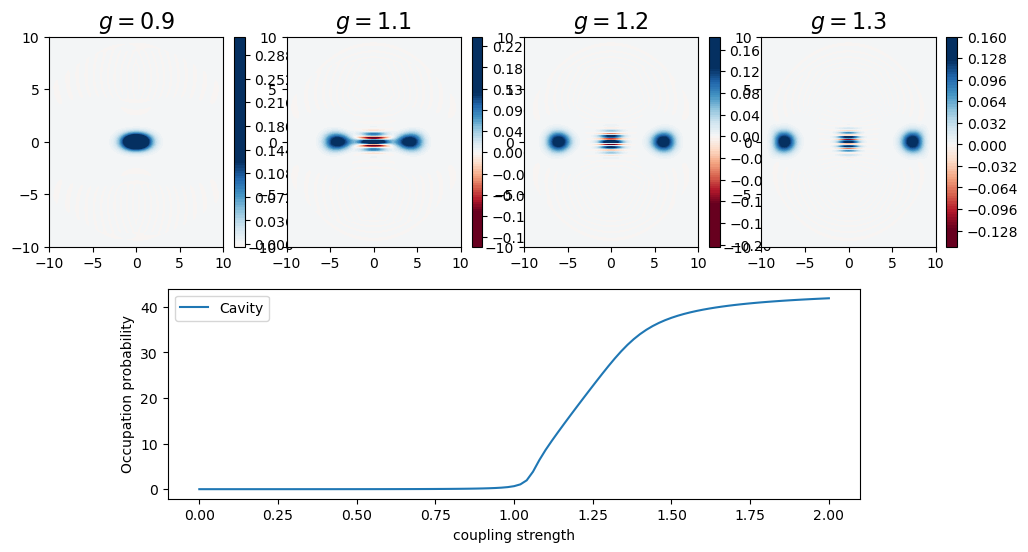

In [83]:
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the parameters
N = 50   # number of cavity states
Omega = 100 # atom frequency
omega = 1.0   # cavity frequency
gc = 1       # coupling strength

# Define the operators and Hamiltonian
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
sz = tensor(qeye(N), sigmaz())
sx = tensor(qeye(N), sigmax())

na = sm.dag() * sm  # Atom occupation number operator
nc = a.dag() * a  # Cavity occupation number operator

# Decoupled Hamiltonian
H0 = omega * a.dag() * a + 0.5 * Omega * sz
H1 = 0.5 * np.sqrt(Omega * omega) * ((sm + sm.dag()) * (a.dag() + a))  

g_vec = np.linspace(0, 2.0, 101)  # Coupling strength vector

psi_list = []

for g in g_vec:
    H = H0 + g * H1
    _, gnd_state = H.groundstate()
    psi_list.append(gnd_state)

# Calculate expectation values
na_expt = expect(na, psi_list)  # Atom occupation probability
nc_expt = expect(nc, psi_list)  # Cavity occupation probability

g_idx = np.where([g_vec == g for g in [0.9, 1.1, 1.2, 1.3]])[1]
psi_sublist = []
for idx in g_idx:
    psi_sublist.append(psi_list[idx])

xvec = np.linspace(-10, 10, 200)

fig_grid = (2, len(psi_sublist) * 2)
fig = plt.figure(figsize=(3 * len(psi_sublist), 6))

for idx, psi in enumerate(psi_sublist):
    rho_cavity = ptrace(psi, 0)
    W = wigner(rho_cavity, xvec, xvec)
    print(rho_cavity)
    ax = plt.subplot2grid(fig_grid, (0, 2 * idx), colspan=2)
    cax = ax.contourf(
        xvec,
        xvec,
        W,
        100,
        norm=mpl.colors.Normalize(-0.125, 0.125),
        cmap=plt.get_cmap("RdBu"),
    )
    ax.set_title(r"$g = %.1f$" % (g_vec[g_idx][idx]),
                 fontsize=16)
    plt.colorbar(cax, ax=ax)  # Add colorbar

# Plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1] - 2))
ax.plot(g_vec, nc_expt, label="Cavity")
ax.legend(loc=0)
ax.set_xlabel("coupling strength")
ax.set_ylabel("Occupation probability")

plt.show()


## 2. Analytic method

### References

 * [M. J.  Hwang, et.al,. Phys. Rev. Lett.115.180404(2015)](https://doi.org/10.1103/PhysRevLett.115.180404)

### 2.1 Normal phase

We derive an exact solution of the Rabi Hamiltonian in the  $\Omega / \omega_{0} \rightarrow \infty$  limit. Firstly, we consider the normal phase,  $g<1$ . By applying a unitary transformation with a squeezing operator  $\mathcal{S}[r]=\exp \left[\frac{r}{2}\left(a^{\dagger 2}-a^{2}\right)\right]$  to the Rabi Hamiltonian, we have

<center>
$\mathcal{S}^{\dagger}[r(g)] H_{n p} \mathcal{S}[r(g)]=\omega_{0}\left\{\cosh (2 r)-\frac{g^{2}}{2} e^{2 r}\right\}\left(a^{\dagger} a+\frac{1}{2}\right)+\frac{\omega_{0}}{2}\left\{\sinh (2 r)-\frac{g^{2}}{2} e^{2 r}\right\}\left(a^{2}+a^{\dagger 2}\right)-\frac{\omega_{0}}{2}-\frac{\Omega}{2}$
<center>

We, then, require that  $(a^{2}+a^{\dagger 2})$  term vanishes, and obtain
<center>
$r_{n p}(g)=\frac{1}{4} \ln \left(1-g^{2}\right)$
<center>

which leads to

<center>
$\mathcal{S}^{\dagger}[r(g)] H_{n p} \mathcal{S}[r(g)]=\epsilon_{n p}(g) a^{\dagger} a+E_{G, n p}(g),$
<center>

where the excitation energy is

<center>
$\epsilon_{n p}(g)=\omega_{0} \sqrt{1-g^{2}},$
<center>

and the ground state energy is
<center>
$E_{G, n p}(g)=\frac{\epsilon_{n p}(g)-\omega_{0}}{2}-\frac{\Omega}{2}$
<center>

The eigenstates and energy eigenvalues of  $H_{\text {Rabi }}$  in normal phase are, therefore,
<center>
$\left|\phi_{n p}^{m}(g)\right\rangle=\mathcal{S}\left[r_{n p}(g)\right]|m\rangle|\downarrow\rangle, \quad E_{n p}^{m}(g)=m \epsilon_{n p}(g)+E_{G, n p}(g),$
<center>

where the spin state  |\downarrow\rangle  comes from the fact that  $H_{n p}$  is a projection of  $H_{\text {Rabi }}$  onto  $\mathcal{H}_{\downarrow}$  subspace.



###  The Wigner function in the Normal phase

We then using the relation
<center>
$W(x, p)=\frac{1}{2 \hbar} \bar{W}\left(\alpha, \alpha^{*}\right)=\frac{1}{2 \pi^{2} \hbar} \int d^{2} \lambda \operatorname{Tr}[\rho D(\lambda)] e^{-\lambda \alpha^{*}+\lambda^{*} \alpha}$
<center>

And we have

<center>
\begin{aligned}
& \frac{1}{2 \pi^{2} \hbar} \int d^{2} \lambda \operatorname{Tr}[\rho D(\lambda)] e^{-\lambda \alpha^{*}+\lambda^{*} \alpha} \\
= & \frac{1}{2 \pi^{2} \hbar} \int d^{2} \lambda \operatorname{Tr}[S|m\rangle\langle m|S^{\dagger} D(\lambda)] e^{-\lambda \alpha^{*}+\lambda^{*} \alpha} \\
= & \frac{1}{2 \pi^{2} \hbar} \int d^{2} \lambda\langle m|S^{\dagger}D(\lambda)S| m\rangle e^{-\lambda \alpha^{*}+\lambda^{*} \alpha} \\
= & \frac{1}{2 \pi^{2} \hbar} \int d^{2} \lambda\left\langle 0\left|S^{\dagger} D(\lambda) S\right| 0\right\rangle e^{-\lambda \alpha^{*}+\lambda^{*} \alpha} \\
= & \frac{1}{2 \pi^{2} \hbar} \int d^{2} \lambda\left\langle 0\left|D\left(\lambda \cosh r+\lambda^{*} e^{i \theta} \sinh r\right)\right| 0\right\rangle e^{-\lambda \alpha^{*}+\lambda^{*} \alpha} \\
= & \frac{1}{2 \pi^{2} \hbar} \int d^{2} \chi\langle 0|D(\chi)| 0\rangle e^{-\chi A^{*}+\chi^{*} A} \\
= & \frac{1}{2 \pi^{2} \hbar} \int d^{2} \chi e^{-\frac{1}{2}|\chi|^{2}} e^{-\chi A^{*}+\chi^{*} A} \\
= & \frac{1}{\pi \hbar} e^{-2|A|^{2}}
\end{aligned}
<center>

Here
<center>
$\chi=\lambda \cosh r+\lambda^{*} e^{i \theta} \sinh r$
<center>

We have
<center>
$
-\lambda \cosh r A^{*}-\lambda^{*} e^{i \theta} \sinh r A^{*}+\lambda^{*} \cosh r A+\lambda e^{-i \theta} \sinh r A  =-\lambda \alpha^{*}+\lambda^{*} \alpha$
<center>
<center>     
$-\lambda\left(\cosh r A^{*}-e^{-i \theta} \sinh r A\right)+\lambda^{*}\left(\cosh r A-e^{i \theta} \sinh r A^{*}\right)  =-\lambda \alpha^{*}+\lambda^{*} \alpha$
<center>

We obtained

<center>
$\alpha^{*}=\cosh r A^{*}-e^{-i \theta} \sinh r A $
<center>
<center>
$\alpha=\cosh r A-e^{i \theta} \sinh r A^{*}$
<center>
<center>
$A=\alpha^{*} \mathrm{e}^{\mathrm{i} \theta} \sinh r+\alpha \cosh r$
<center>

Finally, we obatined the wigner function of the squzzed coherent state

<center>
$W(x, p)=\frac{1}{\pi \hbar} e^{-2\left|\alpha^{*} \mathrm{e}^{\mathrm{i} \theta} \sinh r+\alpha \cosh r\right|^{2}}$
<center>

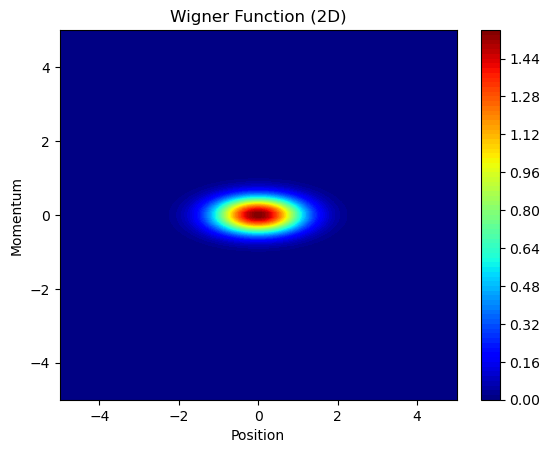

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# 定义参数
g = 0.9;
r = (1/4) * np.log(1 - g**2)  # 压缩参数
theta = 0  # 压缩角度

# 创建网格
xvec = np.linspace(-5, 5, 100)
yvec = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xvec, yvec)
alpha = X + 1j * Y

# 计算 Wigner 函数
alpha_diff_star = np.conj(alpha)
alpha_diff = alpha
term1 = alpha_diff_star * np.exp(1j * theta) * np.sinh(r)
term2 = alpha_diff * np.cosh(r)
W_sc = (1 / 2 * np.pi) * np.exp(-2 * np.abs(term1 + term2) ** 2)

# 绘制二维图
plt.contourf(X, Y, np.real(W_sc), 100, cmap='jet')
plt.colorbar()
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Wigner Function (2D)')
plt.show()


### Super-radiant phase

(The Hamiltonian of the diagonalized superradiation term is detailed in Ref)

The eigenstates and energy eigenvalues of  $H_{\text {Rabi }}$  in superradiant phase are, therefore,

<center>
$\left|\phi_{s p}^{m}(g)\right\rangle_{ \pm}=\mathcal{D}\left[ \pm \alpha_{g}\right] \mathcal{S}\left[r_{s p}\right]|m\rangle\left|\downarrow^{ \pm}\right\rangle$
<center>
    
where the displacement-dependent spin states are

<center>
$\left|\downarrow^{ \pm}\right\rangle=\mp \sqrt{\frac{1-g^{-2}}{2}}|\uparrow\rangle+\sqrt{\frac{1+g^{-2}}{2}}|\downarrow\rangle .$
<center>

And, the wigner function of the Rabi model in the super-radiant phase
<center>
\begin{aligned}
W(x, p)= & \frac{1}{2}\left[W_{\rho_{1}}(x, p)+W_{\rho_{2}}(x, p)\right]+\frac{g^{-2}}{2}\left[W_{\rho_{3}}(x, p)+W_{\rho_{4}}(x, p)\right] \\
= & \frac{1}{2 \pi \hbar}\left[e^{-2\left|\left(\alpha^{*}-\alpha_{g}^{*}\right) e^{i \theta} \sinh r+\left(\alpha-\alpha_{g}\right) \cosh r\right|^{2}}+e^{-2\left|\left(\alpha^{*}+\alpha_{g}^{*}\right) e^{i \theta} \sinh r+\left(\alpha+\alpha_{g}\right) \cosh r\right|^{2}}\right]+ \\
& \frac{g^{-2}}{2 \pi \hbar}\left[e^{-2\left|\cosh r \alpha+\sinh r \alpha^{*}\right|^{2}} e^{-4 I m\left(\alpha_{g} \alpha^{*}\right)}+e^{-2\left|\cosh r \alpha+\sinh r \alpha^{*}\right|^{2}} e^{4 \operatorname{Im}\left(\alpha_{g}^{*} \alpha\right)}\right] \\
= & \frac{1}{2 \pi \hbar}\left[e^{-2\left|\left(\alpha^{*}-\alpha_{g}^{*}\right) e^{i \theta} \sinh r+\left(\alpha-\alpha_{g}\right) \cosh r\right|^{2}}+e^{-2\left|\left(\alpha^{*}+\alpha_{g}^{*}\right) e^{i \theta} \sinh r+\left(\alpha+\alpha_{g}\right) \cosh r\right|^{2}}+2 g^{-2} e^{-2\left|\cosh r \alpha+\sinh r \alpha^{*}\right|^{2}} \cos \left[4 I m\left(\alpha_{g}^{*} \alpha\right)\right]\right]
\end{aligned}
<center>

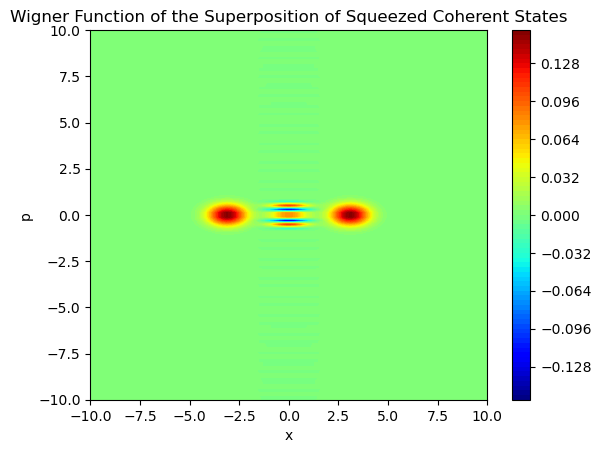

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
Omega = 100
omega0 = 1
g = 1.1  
theta = 0

# 计算 r_{sp}(g)
r =  0.25 * np.log(1 - g**(-4))

# 计算 alpha_g
alpha_g = np.sqrt(Omega / (4 * g**2 * omega0)) * np.sqrt(g**4 - 1)

# 定义 x 和 p 的网格
xvec = np.linspace(-10, 10, 100)
pvec = np.linspace(-10, 10, 100)
X, P = np.meshgrid(xvec, pvec)
alpha = X + 1j * P  # 将 (x, p) 转换为 (alpha)

# 计算 Wigner 函数
term1 = np.exp(-2 * np.abs((np.conj(alpha) - np.conj(alpha_g)) * np.sinh(r) + (alpha - alpha_g) * np.cosh(r))**2)
term2 = np.exp(-2 * np.abs((np.conj(alpha) + np.conj(alpha_g)) * np.sinh(r) + (alpha + alpha_g) * np.cosh(r))**2)
term3 = 2 * g**(-2) * np.exp(-2 * np.abs(np.cosh(r) * alpha + np.sinh(r) * np.conj(alpha))**2) * np.cos(4 * np.imag(alpha * np.conj(alpha_g)))

W = (1 / (2 * np.pi)) * (term1 + term2 + term3)

# 绘制 Wigner 函数
plt.figure()
plt.contourf(xvec, pvec, W, 100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('p')
plt.title('Wigner Function of the Superposition of Squeezed Coherent States')
plt.show()
